<a href="https://colab.research.google.com/github/arzucivelekoglu/basic-opencv-subjects/blob/main/10_Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contours**

Konturlar, bir nesnenin tüm sınırını sınırlayan veya kaplayan sürekli çizgiler veya eğrilerdir.



## **Canny**


Canny, görüntü işleme ve bilgisayarlı görü görüntü işleme alanında oldukça popüler bir kenar algılama yöntemidir. John F. Canny tarafından 1986 yılında geliştirilen bu yöntem, görüntülerdeki önemli kenarları belirlemek için kullanılır.

Canny kenar algılama yöntemi, görüntüdeki kenarları tespit etmek için aşağıdaki adımları içerir:

**1. Gauss Filtresi Uygulama:** Görüntüdeki gürültüyü azaltmak için Gauss filtresi uygulanır.

**2. Gradyan Hesaplama:** Filtrelenmiş görüntü üzerinde Sobel operatörü kullanılarak gradyan (kenarlık) bilgisi hesaplanır. Bu, görüntüdeki yoğunluk değişikliklerini belirler.

**3. Non-maximum Supresyon:** Gradyanın maksimum olduğu kenar noktalarını belirlemek için non-maximum suppression (maksimum olmayan noktaların bastırılması) uygulanır. Bu, kenarların daha ince olmasını sağlar.

**4. Kenar Eşikleme:** İki eşik değeri kullanılarak güçlü ve zayıf kenar pikselleri belirlenir. Güçlü kenarlar doğrudan kenar olarak kabul edilirken, zayıf kenarlar daha fazla analiz için tutulur.

**5. Kenar Bağlantısı (Histeresis):** Güçlü kenar pikselleri bir kenarla ilişkilendirilirken, zayıf kenar pikselleri ancak güçlü kenarlarla bağlantılı oldukları durumda kenar olarak kabul edilir.



```
edges = cv2.Canny(image, threshold1, threshold2, apertureSize=3, L2gradient=False)

```

Parametreler:

* **image:** Kenar algılamanın uygulanacağı girdi görüntü.
* **threshold1:** İlk eşik değeri. Zayıf kenar piksellerinin güçlü kenar piksellerine dönüşeceği alt eşik değeri.
threshold2: İkinci eşik değeri. Güçlü kenar piksellerinin belirleneceği üst eşik değeri.
* **apertureSize:** Gradyanın hesaplanmasında kullanılacak Sobel çekirdeğinin boyutu. Genellikle 3 kullanılır.
* **L2gradient:** Eğer True ise, daha hassas L2 normu kullanılır. Varsayılan olarak False.

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/content/Cars108.png")
edges = cv2.Canny(image, 300,200)

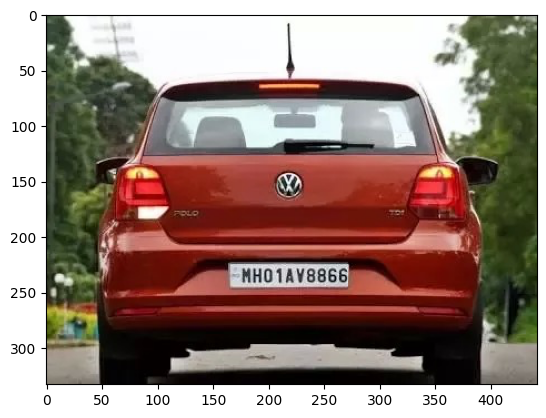

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

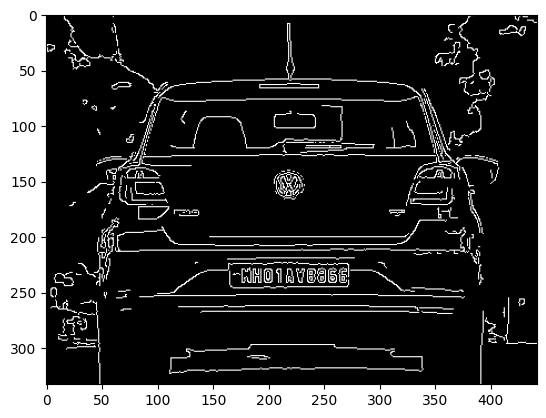

In [ ]:
plt.imshow(edges , cmap = "gray")

##**findContours()**

 `cv2.findContours()` fonksiyonu, OpenCV kütüphanesinde görüntü üzerindeki konturları bulmak için kullanılan bir fonksiyondur. Bu fonksiyon, kenar algılanmış bir görüntüden veya bir maskeleme görüntüsünden nesnelerin sınırlarını bulmayı sağlar.



```
contours, hierarchy = cv2.findContours(image, mode, method, contours=None, hierarchy=None, offset=None)

```

**Parametreler:**

* **image:** Girdi görüntü. Bu, kenar algılanmış bir görüntü olabilir veya daha önceden nesneleri beyaz, arka planı siyah renkte içeren bir maskeleme görüntüsü olabilir. Genellikle gri tonlamalı bir görüntü veya kenar algılamadan geçirilmiş bir görüntü kullanılır.

* **mode:** Kontur bulma yöntemi belirten parametre. Bu parametre, kontur hiyerarşisi bilgisini değiştirebilir ve konturların nasıl birleştirileceğini kontrol eder. Konturları bulmak için kullanabileceğiniz seçenekler şunlardır:
  * **cv2.RETR_EXTERNAL:** Yalnızca en dış konturları alır. İç içe geçmiş konturlar hariç tutulur.
  * **cv2.RETR_LIST:** Tüm konturları düz bir liste olarak alır, hiyerarşi bilgisi verilmez.
  * **cv2.RETR_CCOMP:** İç içe geçmiş konturları bile alır ve iki düzeyde hiyerarşik bir yapıda düzenler.
  * **cv2.RETR_TREE:** Tüm konturları alır ve tüm hiyerarşi bilgisini korur.
* **method:** Kontur yaklaşım yöntemini belirten parametre. Bu parametre, kontur noktalarını daha az bellek kullanacak şekilde yaklaşık olarak belirlemek için kullanılır. Kontur noktalarını yaklaşık hale getirmek için kullanabileceğiniz seçenekler şunlardır:
  * **cv2.CHAIN_APPROX_NONE:** Tüm kontur noktalarını saklar.
  * **cv2.CHAIN_APPROX_SIMPLE:** Bir kontur hattını tanımlamak için yalnızca uç noktaları saklar.
  * **cv2.CHAIN_APPROX_TC89_L1:** Teh-Chin yaklaşımı kullanarak kontur hattını saklar.
  * **cv2.CHAIN_APPROX_TC89_KCOS:** Teh-Chin yaklaşımı kullanarak kontur hattını saklar.
* **contours:** Bulunan konturların listesini döndürmek için kullanılan parametre (Opsiyonel).
hierarchy: Kontur hiyerarşisi bilgisini döndürmek için kullanılan parametre (Opsiyonel).
* **offset:** Opsiyonel bir parametredir ve konturları düzgün bir şekilde çıkartmak için kullanılabilir.


Fonksiyon, **contours** ve **hierarchy** olmak üzere iki çıktı döndürür. contours, bir liste içinde bulunan her bir kontur için bir NumPy dizisi içeren bir liste olacaktır. Her bir kontur, 2D düzleminde noktaları temsil eden NumPy dizisidir. hierarchy ise, konturların hiyerarşik yapısını içeren bir NumPy dizisidir. Bu dizide, her kontur için bir dizi içindeki dört değeri içeren bir yapı vardır.



In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/content/Cars108.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (1,1),0)
ret,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#edges = cv2.Canny(blur, 100,100)

(<matplotlib.image.AxesImage at 0x7dde785241c0>,
 Text(0.5, 1.0, 'Thresholding'))

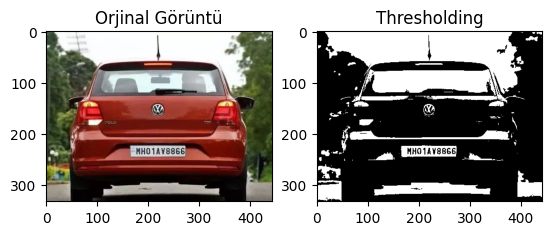

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), ax1.set_title("Orjinal Görüntü")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)), ax2.set_title("Thresholding")



In [ ]:
# Kontur çizgilerini bulup orjinal görüntü üzerinde çizdiriyoruz
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)

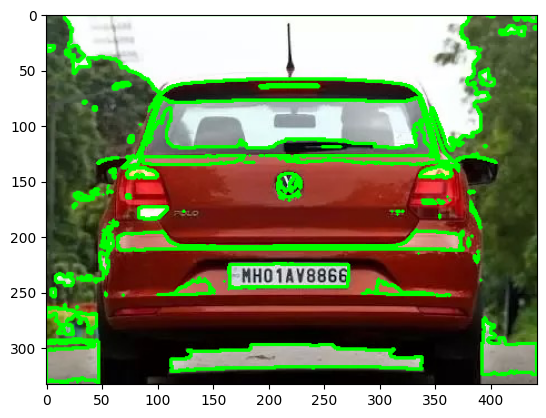

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

⚡ **boundingRect()**

cv2.boundingRect() fonksiyonu, OpenCV kütüphanesindeki bir fonksiyondur ve bir konturun çevreleyen dikdörtgeni (bounding rectangle) bilgisini elde etmek için kullanılır. Kontur, nesnelerin sınırlarını temsil eden bir liste içindeki noktaları içeren bir NumPy dizisidir. cv2.boundingRect() fonksiyonu bu nokta listesini alır ve bu noktaları içeren en küçük dikdörtgenin dört kenarının koordinatlarını döndürür.

Fonksiyonun imzası şu şekildedir:


```
x, y, width, height = cv2.boundingRect(points)

```
Parametre:

* **points:** Konturunun noktalarını içeren NumPy dizisi. Bu dizi, cv2.findContours() fonksiyonundan elde edilen kontur listesinden seçilebilir.
Dönen değerler:

* **x:** Dikdörtgenin sol üst köşesinin x koordinatı.
* **y:** Dikdörtgenin sol üst köşesinin y koordinatı.
* **width:** Dikdörtgenin genişliği (x eksenine göre).
* **height:** Dikdörtgenin yüksekliği (y eksenine göre).

Bu dört değer, verilen konturun en küçük dikdörtgeni tarafından sınırlanan alanın koordinatlarını ve boyutlarını temsil eder. Bu bilgiler, konturun hızlı bir şekilde sınırlanması veya diğer işlemler için kullanılabilir.


Aşağıdaki örnekte alan değerine göre kontur filtrelemesi yaptık. Daha sonra bunları rectangle ile çizip kaydettik.

In [ ]:
def filter_contours_by_area(contours, min_area, max_area):
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area <= area <= max_area:
            filtered_contours.append(contour)
    return filtered_contours

In [ ]:
## Her konturun çevreleyen dikdörtgenini elde et
# Filtrelenmiş dikdörtgenleri işaretle ve kaydet

filtered_contours = filter_contours_by_area(contours, 500, 10000)

for i, contour in enumerate(filtered_contours):
    x, y, width, height = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 0, 255), 2)

    ni = image[y:y+height, x:x+width]
    cv2.imwrite("/content/deneme/"+"detected_rectangle_"+str(i)+".png", ni)

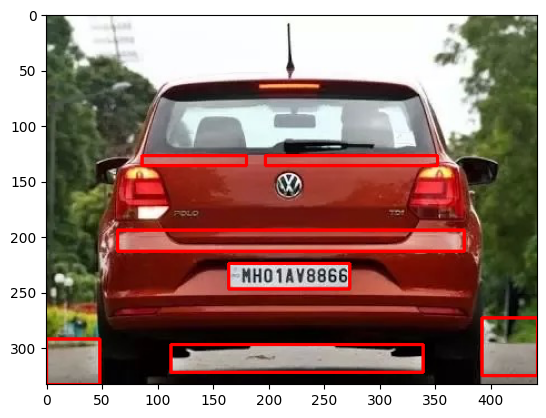

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))